# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

## 1. 데이터 불러오기

In [2]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


## 2. 데이터 전처리: 결측치 처리, 범주형 데이터의 인코딩, 수치형 데이터의 스케일링 등을 수행하기

In [4]:
# 결측치 확인

print(data.isnull().sum())

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


연속형 변수개수: 5


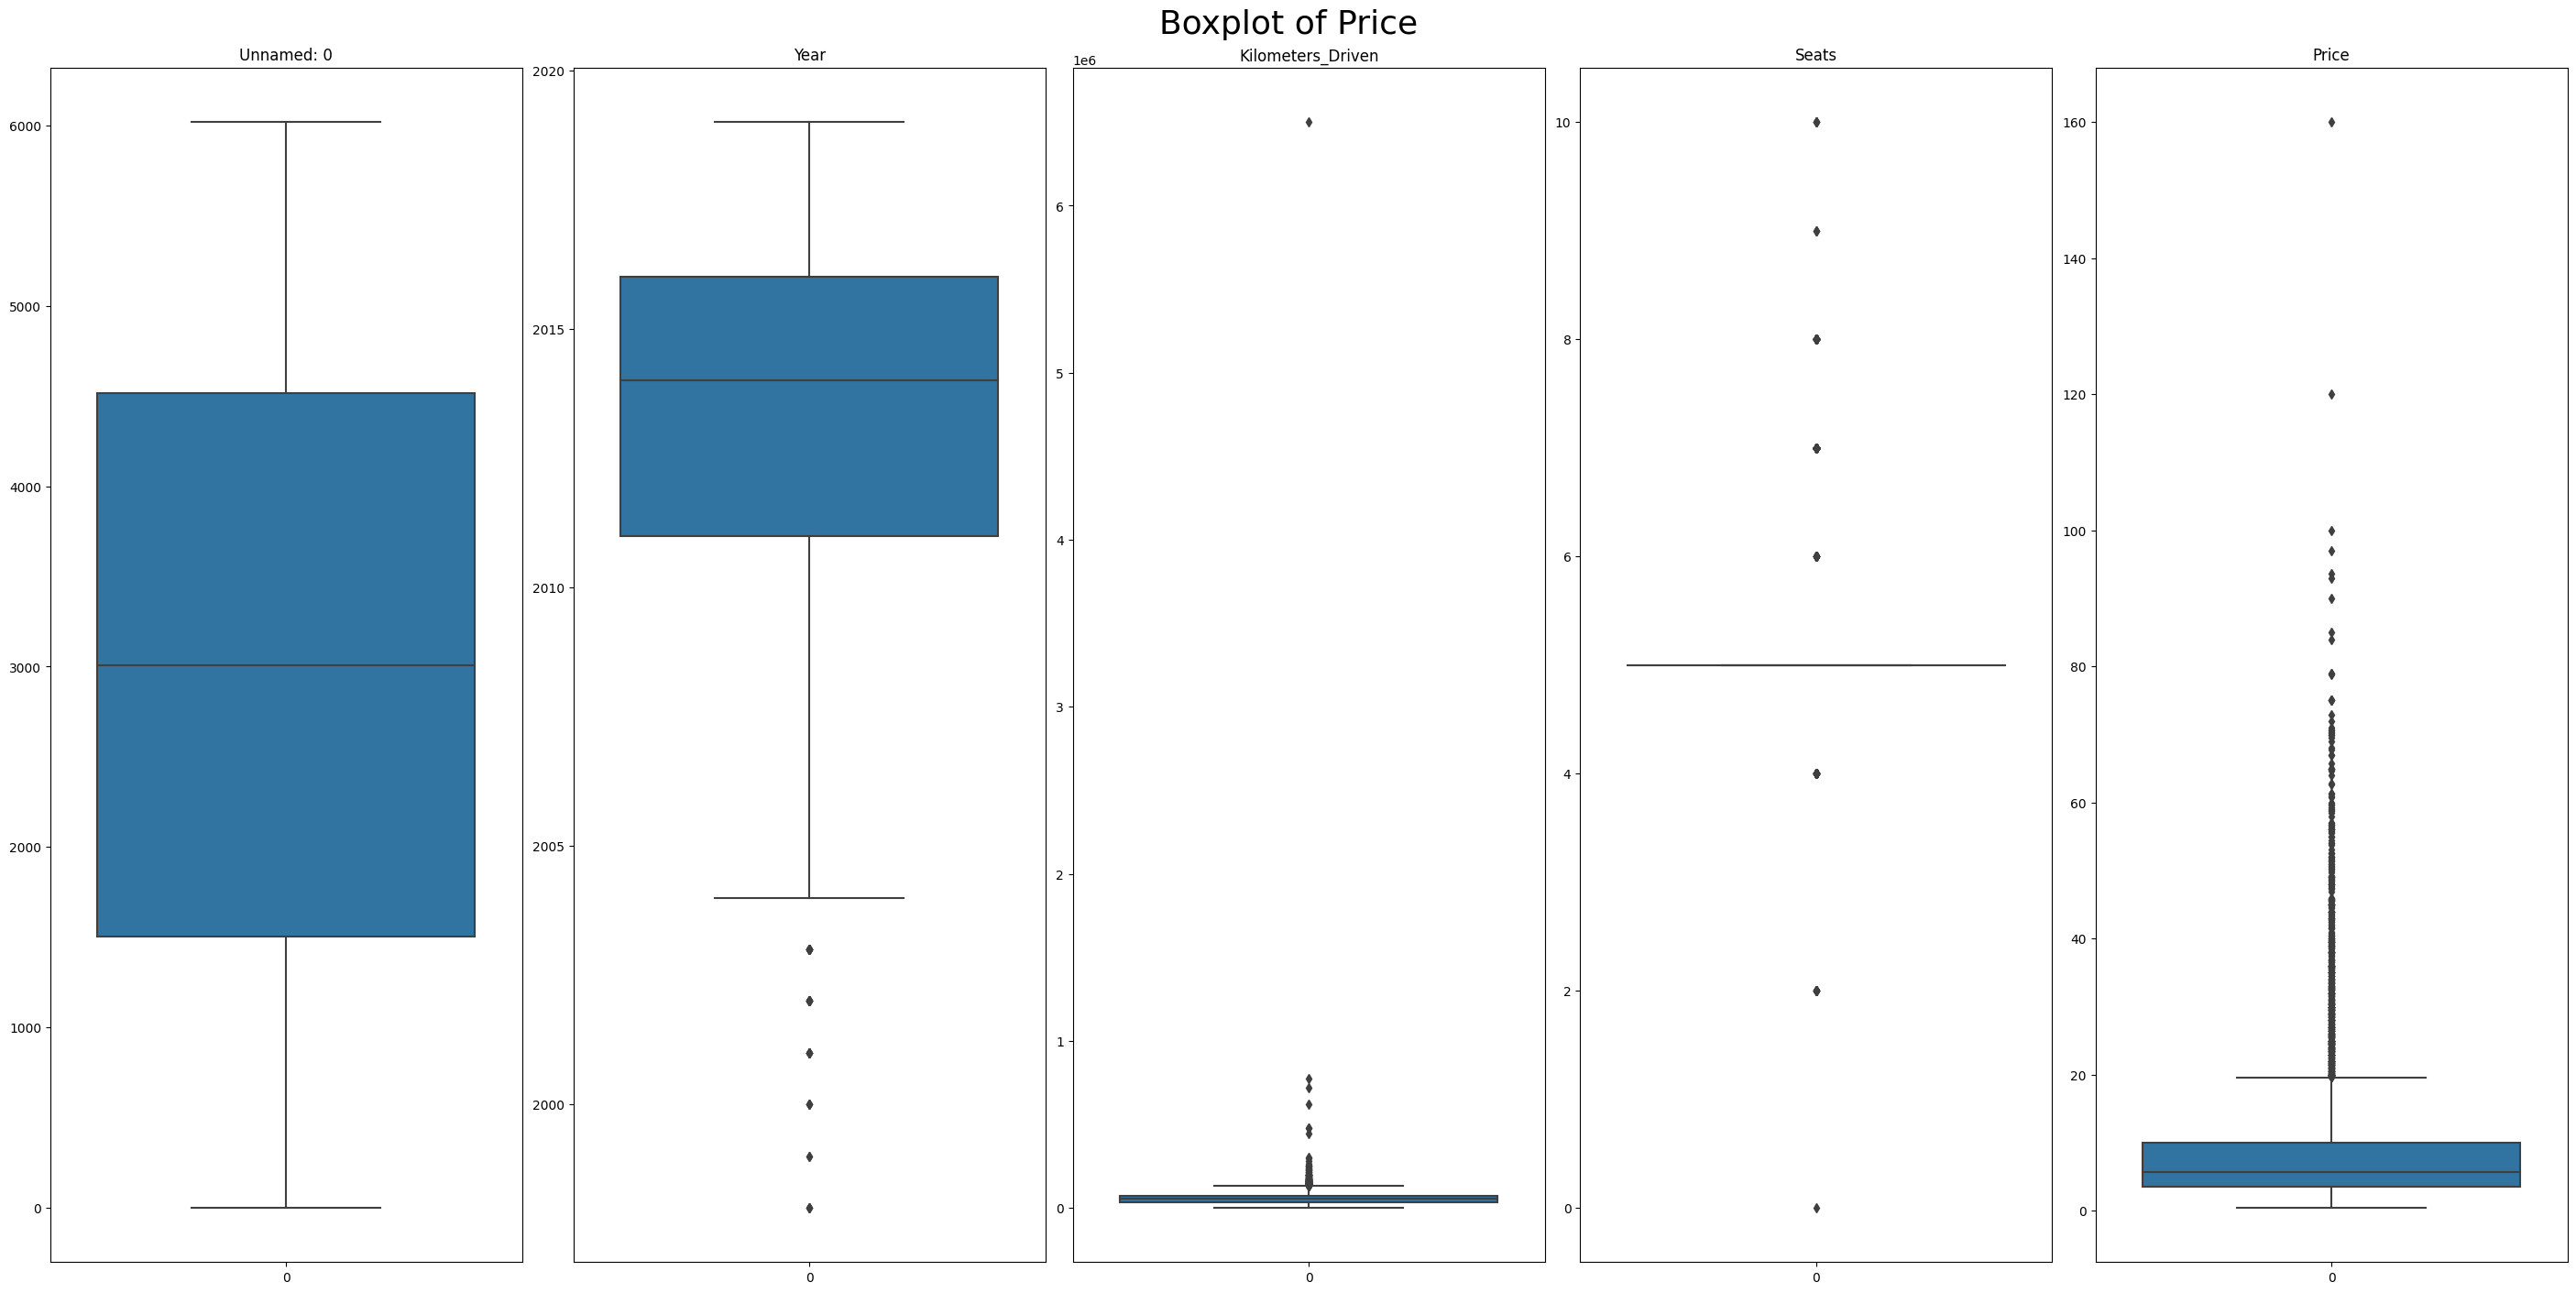

In [5]:
# 이상치 확인

# 연속형 변수 찾기
continuous_variables = []
for column in data.columns:
    if data[column].dtype != object:
        continuous_variables.append(column)
        
print("연속형 변수개수:", len(continuous_variables))

# 박스플롯으로 이상치 검토
fig, ax = plt.subplots(1, 5, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Price', fontsize=26)

for i in range(len(continuous_variables)):
    ax[i].set(title = continuous_variables[i])
    sns.boxplot(data[continuous_variables[i]], ax=ax[i]).set(xlabel=None,  ylabel=None)
    
plt.show()

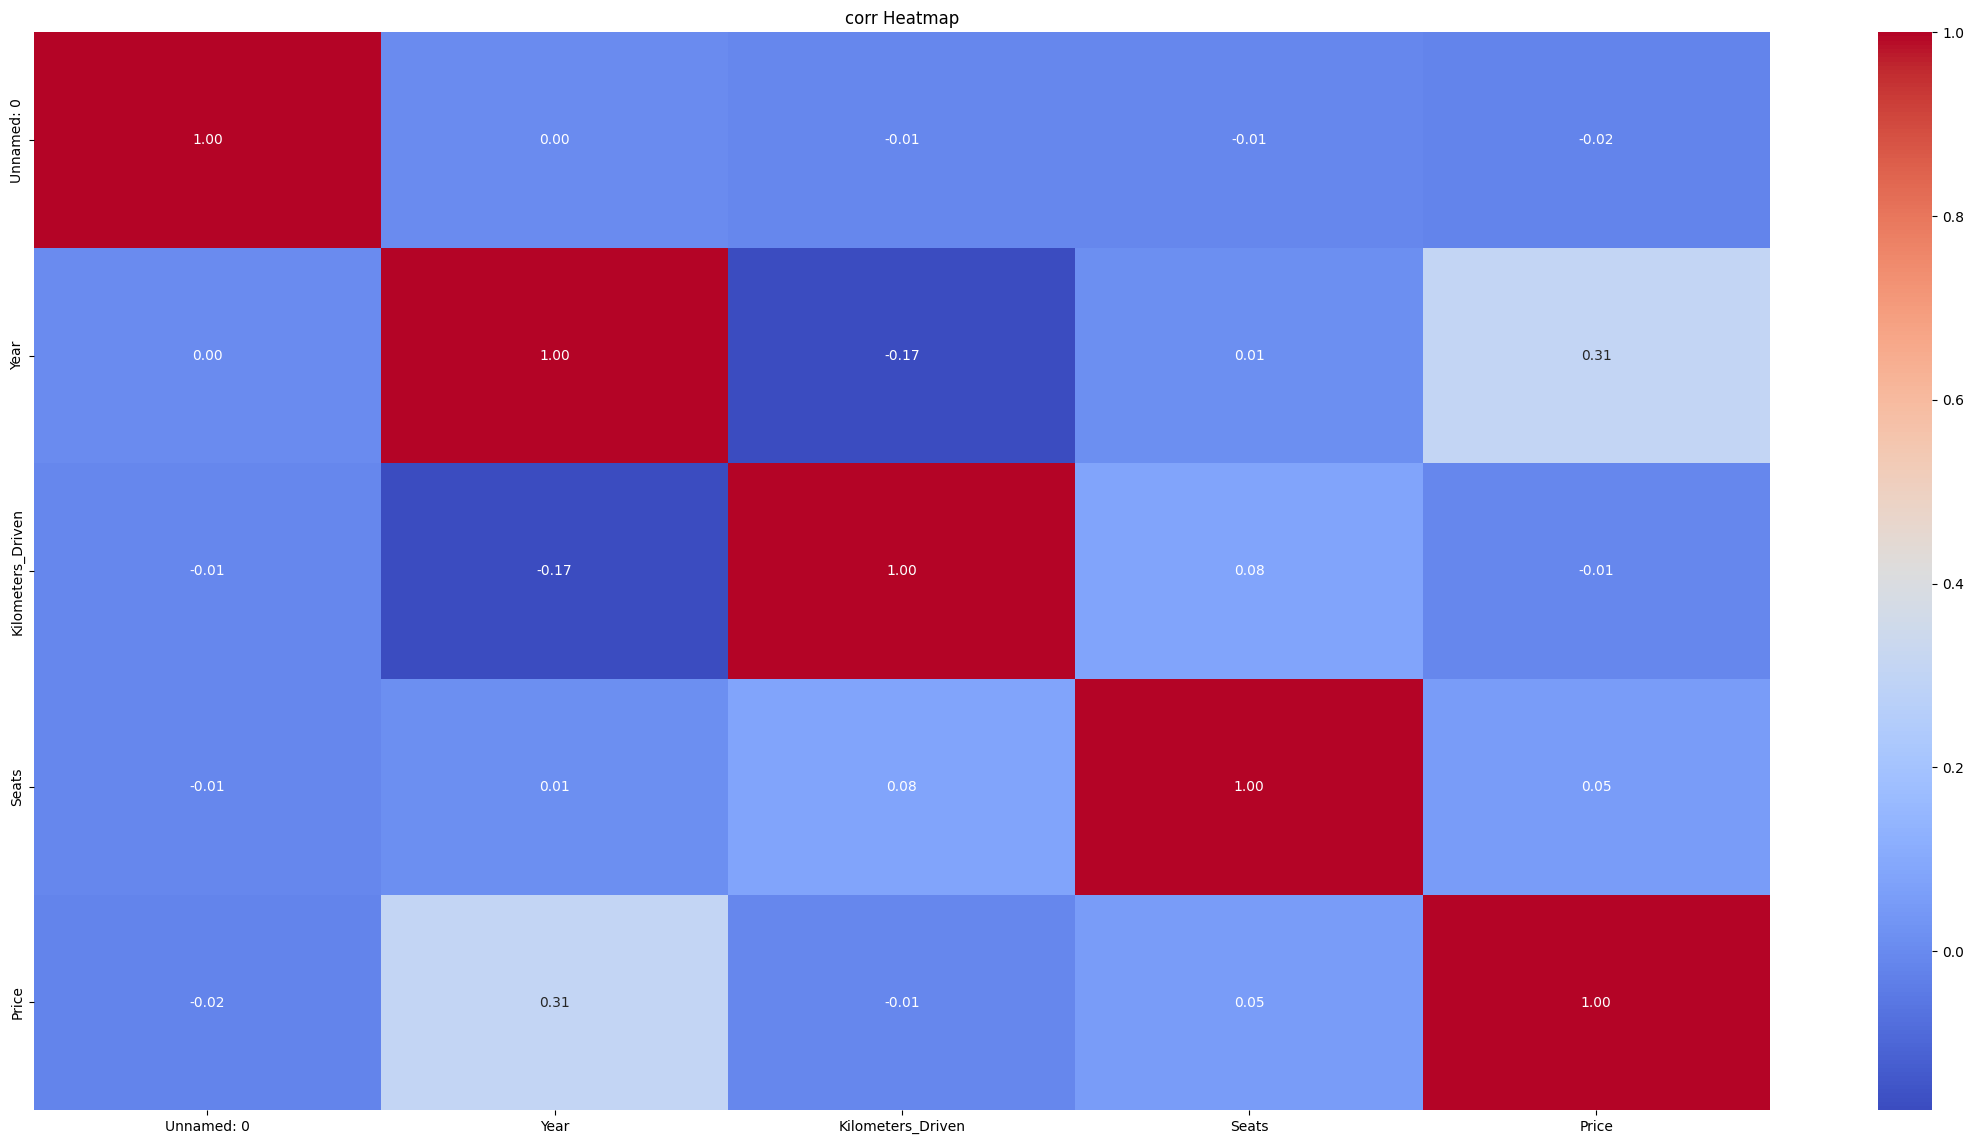

In [6]:
#상관계수 히트맵
correlation_matrix = data[continuous_variables].corr()
plt.figure(figsize=(28, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('corr Heatmap')

plt.show()

In [7]:
# 카테고리 열 추출
categoric_cols = [categoric for categoric in data.columns if data[categoric].dtypes == 'object']
categoric_cols

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'New_Price']

In [8]:
# 분석 및 예측에 필요 없는 열 삭제
data = data.drop(columns=['Unnamed: 0', 'New_Price'])

In [9]:
# 포멧 변경
data['Engine'] = data['Engine'].str.replace('CC','')
data['Power'] = data['Power'].str.replace('bhp','')
data['Mileage'] = data['Mileage'].str.replace('kmpl','')
data['Mileage'] = data['Mileage'].str.replace('km/kg','')

In [10]:
# 데이터 유형 변경
data['Engine'] = data['Engine'].astype(float)
# data['Power'] = data['Power'].astype(float)
data['Mileage'] = data['Mileage'].astype(float)

In [11]:
data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44,936.0,57.6,5.0,2.50


In [12]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,10.000000,160.000000


### EDA

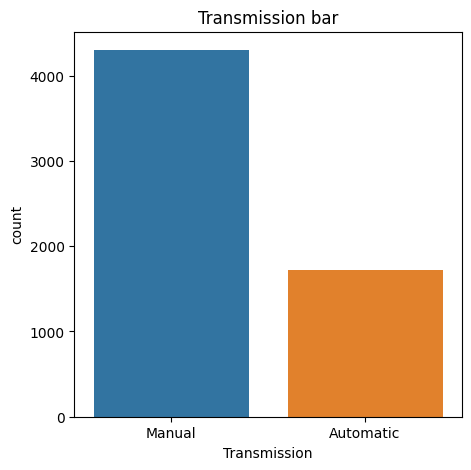

In [13]:
plt.figure(figsize = (5,5))
sns.countplot(x = data['Transmission'])
plt.title('Transmission bar')

plt.show()

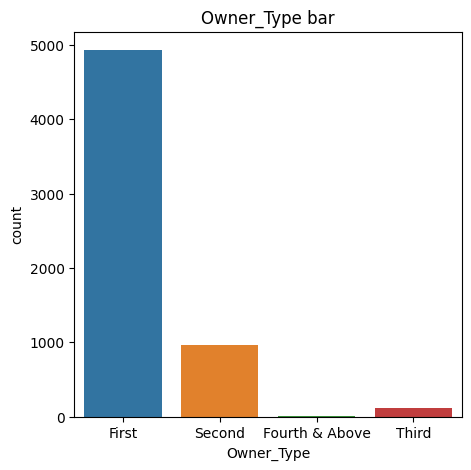

In [14]:
plt.figure(figsize = (5,5))
sns.countplot(x = data['Owner_Type'])
plt.title('Owner_Type bar')

plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR

In [16]:
# 수치형 데이터 스케일링 + 결측치를 해당 수치형 특성의 평균값으로 대체
numeric_pipeline = Pipeline([
    ('num_pipe', StandardScaler()),
    ('impute', SimpleImputer(strategy='mean'))
])

# 결측치를 해당 범주형 특성의 가장 빈도가 높은 값으로 대체 + 범주형 데이터를 원핫 인코딩하여 이진 형태로 변환
categoric_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('cat_pipe', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Seats']),
    ('categoric', categoric_pipeline, ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Power'])
])

## 3. 모델 선택 및 하이퍼파라미터 튜닝: SVR 모델을 선택

In [17]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('algo', SVR(max_iter=500))
])

In [18]:
X = data.drop(columns='Price')
y = data.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('num_pipe',
                                                                   StandardScaler()),
                                                                  ('impute',
                                                                   SimpleImputer())]),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine',
                                                   'Seats']),
                                                 ('categoric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_pipe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name', 'Location',
                                                   'Fuel_Type', 'Transmission',
                                                   'Owner_Type', 'Power'])])),
                ('algo', SVR(max_iter=500))])

In [20]:
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)

(0.7131407276215592, 0.7199702104640906)

In [21]:
parameter = {
    'algo__C' : [0.1, 1, 10, 100, 1000],
    'algo__gamma' : [1, 0.1, 0.01, 0.001, 0.0001]
}

## 4. 모델 학습: 최적의 하이퍼파라미터로 구성된 SVR 모델을 학습

In [22]:
# GridSearchCV를 사용하여 그리드 서치를 수행한 후, 최적의 하이퍼파라미터 조합과 그에 해당하는 최고 성능 모델 추출
model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('num_pipe',
                                                                                          StandardScaler()),
                                                                                         ('impute',
                                                                                          SimpleImputer())]),
                                                                         ['Year',
                                                                          'Kilometers_Driven',
                                                                          'Mileage',
                                                                          'Engine',
                                                                          'Seats']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('cat_pipe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Name',
                                                                          'Location',
                                                                          'Fuel_Type',
                                                                          'Transmission',
                                                                          'Owner_Type',
                                                                          'Power'])])),
                                       ('algo', SVR(max_iter=500))]),
             n_jobs=-1,
             param_grid={'algo__C': [0.1, 1, 10, 100, 1000],
                         'algo__gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=1)

In [23]:
# 최적의 하이퍼파라미터 조합
print("최적의 하이퍼파라미터 조합:", model.best_params_)

# 최고 성능 모델의 R-squared 값
print("최고 성능 모델 R-squared:", model.best_score_)

최적의 하이퍼파라미터 조합: {'algo__C': 100, 'algo__gamma': 0.1}
최고 성능 모델 R-squared: 0.8758160958078852


## 5. 모델 평가: 학습 데이터와 테스트 데이터에 대해 R-squared 값을 계산하여 모델의 성능을 평가

In [24]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9757707843525605, 0.8780730142936497)

## 6. 회귀 진단

In [25]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

In [26]:
dic={'Y_pred' :y_pred,'residual' : residuals}
df1=pd.DataFrame(dic)
df1.head()

,Y_pred,residual
2868,6.554037,-0.804037
5924,11.156888,-1.076888
3764,7.627380,0.222620
4144,4.397003,-1.997003
2780,5.203057,-3.603057


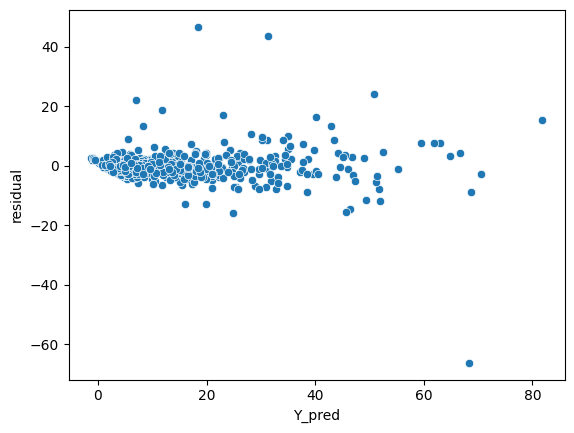

In [27]:
sns.scatterplot(data=df1,x='Y_pred',y='residual')
plt.show()